# COMP532 - Assignment 2 Code

- Pantelis Kasioulis | 201801753 | p.kasioulis@liverpool.ac.uk
- Ewa Fojcik | 201529790 | e.k.fojick@liverpool.ac.uk
- Gabriel Thomas Newton | 201855293 | g.newton2@liverpool.ac.uk
- Zoi Kallinaki | 201832458 | z.kallinaki@liverpool.ac.uk

### Importing Libraries:

In [ ]:
!apt-get install -y swig
!pip install gymnasium[box2d]

import gymnasium as gym
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from gymnasium.wrappers import RecordVideo
from tqdm import tqdm
import os
import cv2

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  swig4.0
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 34 not upgraded.
Need to get 1,116 kB of archives.
After this operation, 5,542 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig4.0 amd64 4.0.2-1ubuntu1 [1,110 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig all 4.0.2-1ubuntu1 [5,632 B]
Fetched 1,116 kB in 1s (830 kB/s)
Selecting previously unselected package swig4.0.
(Reading database ... 126101 files and directories currently installed.)
Preparing to unpack .../swig4.0_4.0.2-1ubuntu1_amd64.deb ...
Unpacking swig4.0 (4.0.2-1ubuntu1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_4.0.2-1ubunt

Environment and Agent Setup

In [ ]:
class QNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super(QNetwork, self).__init__()
        self.fc1 = nn.Linear(state_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, action_size)

    def forward(self, state):
        x = torch.relu(self.fc1(state))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

state_size = 8
action_size = 4

qnetwork = QNetwork(state_size, action_size).to(device)
optimizer = optim.Adam(qnetwork.parameters(), lr=0.001)
criterion = nn.MSELoss()

Training RL model


Starting training with decay rate: 0.9970


Decay 0.0030:   0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Decay 0.0030:   0%|          | 1/1000 [00:00<14:21,  1.16it/s]


Episode 1/1000, Reward: -378.24, Epsilon: 0.997, Loss: 108.5641


Decay 0.0030:  25%|██▌       | 250/1000 [01:18<27:58,  2.24s/it]


Episode 250/1000, Reward: -61.13, Epsilon: 0.472, Loss: 1.7174


Decay 0.0030:  50%|█████     | 500/1000 [06:27<29:19,  3.52s/it]


Episode 500/1000, Reward: -86.05, Epsilon: 0.223, Loss: 1.6626


Decay 0.0030:  75%|███████▌  | 750/1000 [13:46<06:07,  1.47s/it]


Episode 750/1000, Reward: 168.44, Epsilon: 0.105, Loss: 12.2229


Decay 0.0030: 100%|██████████| 1000/1000 [18:37<00:00,  1.12s/it]



Episode 1000/1000, Reward: -70.14, Epsilon: 0.050, Loss: 65.4380


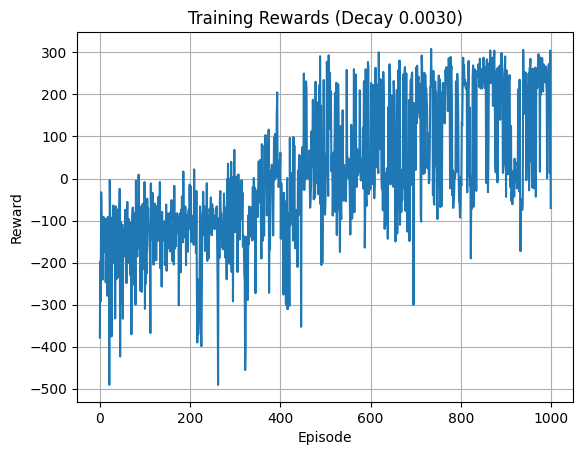

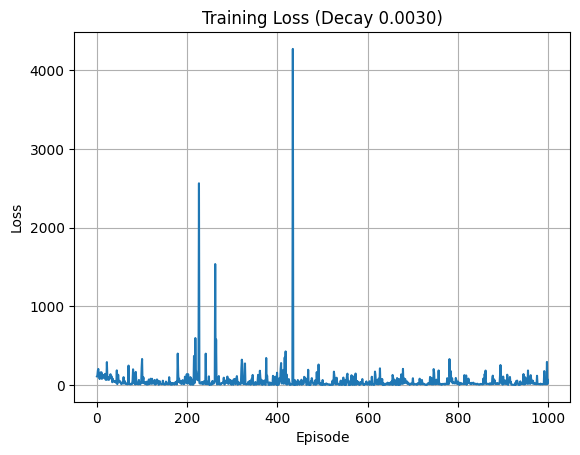


Starting training with decay rate: 0.9950


Decay 0.0050:   0%|          | 2/1000 [00:00<02:48,  5.91it/s]


Episode 1/1000, Reward: -342.36, Epsilon: 0.995, Loss: 532.9626


Decay 0.0050:  25%|██▌       | 250/1000 [03:02<25:22,  2.03s/it]


Episode 250/1000, Reward: 235.08, Epsilon: 0.286, Loss: 21.1217


Decay 0.0050:  50%|█████     | 500/1000 [08:38<10:38,  1.28s/it]


Episode 500/1000, Reward: 276.62, Epsilon: 0.082, Loss: 7.2383


Decay 0.0050:  75%|███████▌  | 750/1000 [11:55<05:02,  1.21s/it]


Episode 750/1000, Reward: 280.76, Epsilon: 0.023, Loss: 7.5576


Decay 0.0050: 100%|██████████| 1000/1000 [15:03<00:00,  1.11it/s]



Episode 1000/1000, Reward: 260.18, Epsilon: 0.010, Loss: 5.6427


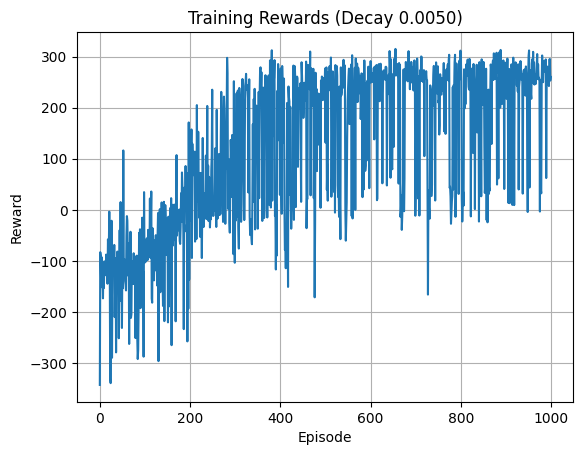

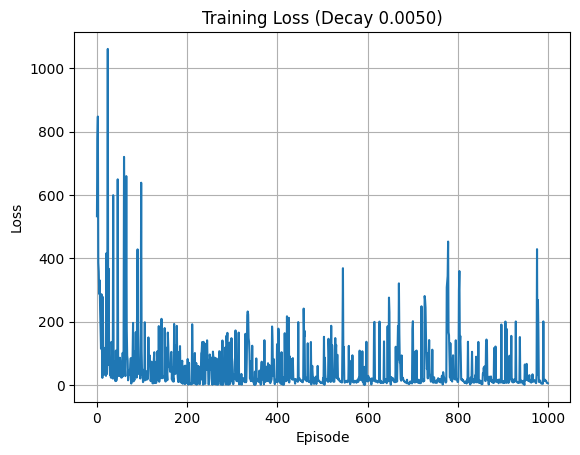


Starting training with decay rate: 0.9900


Decay 0.0100:   0%|          | 2/1000 [00:00<02:43,  6.10it/s]


Episode 1/1000, Reward: -138.63, Epsilon: 0.990, Loss: 1519.7164


Decay 0.0100:  25%|██▌       | 250/1000 [04:40<22:34,  1.81s/it]


Episode 250/1000, Reward: 240.41, Epsilon: 0.081, Loss: 17.2097


Decay 0.0100:  50%|█████     | 500/1000 [08:18<07:20,  1.14it/s]


Episode 500/1000, Reward: 274.27, Epsilon: 0.010, Loss: 9.8179


Decay 0.0100:  75%|███████▌  | 750/1000 [11:11<04:00,  1.04it/s]


Episode 750/1000, Reward: 295.28, Epsilon: 0.010, Loss: 8.5564


Decay 0.0100: 100%|██████████| 1000/1000 [14:27<00:00,  1.15it/s]



Episode 1000/1000, Reward: 259.04, Epsilon: 0.010, Loss: 8.8076


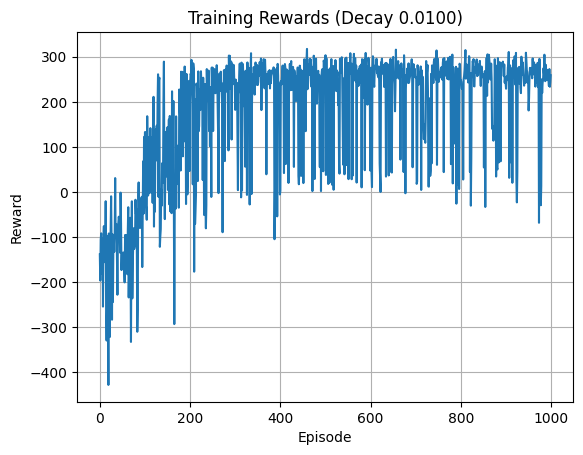

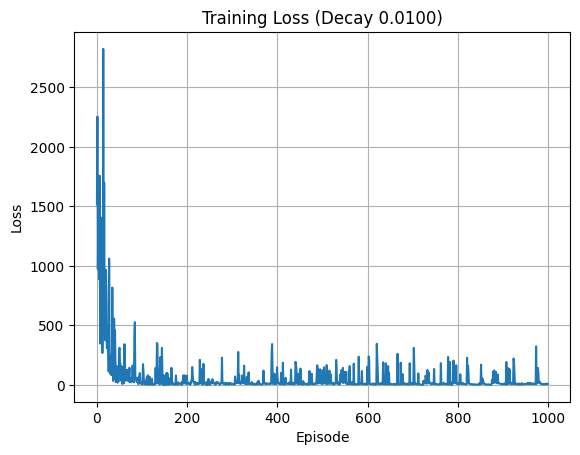

In [ ]:
decay_rates = [1 - 0.003, 1 - 0.005, 1 - 0.01]

num_episodes = 1000
gamma = 0.99
epsilon_min = 0.01

record_episodes = [250, 500, 750, 1000]

for idx, decay_rate in enumerate(decay_rates, start=1):
    print(f"\nStarting training with decay rate: {decay_rate:.4f}")

    video_folder = f"./videos{idx}"
    os.makedirs(video_folder, exist_ok=True)

    env = gym.make("LunarLander-v3", disable_env_checker=True, render_mode="rgb_array")

    epsilon = 1.0
    rewards = []
    losses = []

    for episode in tqdm(range(1, num_episodes + 1), desc=f"Decay {1 - decay_rate:.4f}"):
        state, _ = env.reset()
        total_reward = 0
        done = False
        episode_losses = []

        record_video = episode in record_episodes
        if record_video:
            frames = []

        force_exploitation = record_video
        if force_exploitation:
            old_epsilon = epsilon
            epsilon = 0.0

        while not done:
            if record_video:
                frame = env.render()
                frames.append(frame)

            state_tensor = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)

            if np.random.rand() < epsilon:
                action = env.action_space.sample()
            else:
                with torch.no_grad():
                    q_values = qnetwork(state_tensor)
                    action = torch.argmax(q_values).item()

            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            next_state_tensor = torch.tensor(next_state, dtype=torch.float32, device=device).unsqueeze(0)
            with torch.no_grad():
                target = reward + gamma * qnetwork(next_state_tensor).max(1)[0] * (0 if done else 1)

            current = qnetwork(state_tensor)[0, action]
            loss = criterion(current, target)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            episode_losses.append(loss.item())

            state = next_state
            total_reward += reward

        avg_episode_loss = sum(episode_losses) / len(episode_losses) if episode_losses else 0
        losses.append(avg_episode_loss)

        if force_exploitation:
            epsilon = old_epsilon

        if epsilon > epsilon_min:
            epsilon *= decay_rate

        rewards.append(total_reward)

        if record_video:
            video_path = os.path.join(video_folder, f"decay{1-decay_rate:.4f}_episode{episode}.mp4")
            height, width, _ = frames[0].shape
            out = cv2.VideoWriter(video_path, cv2.VideoWriter_fourcc(*'mp4v'), 30, (width, height))
            for frame in frames:
                frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
                out.write(frame)
            out.release()

        if episode == 1 or episode % 250 == 0 or episode == num_episodes:
            tqdm.write(f"\nEpisode {episode}/{num_episodes}, Reward: {total_reward:.2f}, Epsilon: {epsilon:.3f}, Loss: {avg_episode_loss:.4f}")

    env.close()

    plt.figure()
    plt.plot(rewards)
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title(f'Training Rewards (Decay {1 - decay_rate:.4f})')
    plt.grid(True)
    plt.savefig(f'rewards_plot_decay_{1-decay_rate:.4f}.png')
    plt.show()

    plt.figure()
    plt.plot(losses)
    plt.xlabel('Episode')
    plt.ylabel('Loss')
    plt.title(f'Training Loss (Decay {1 - decay_rate:.4f})')
    plt.grid(True)
    plt.savefig(f'loss_plot_decay_{1-decay_rate:.4f}.png')
    plt.show()